<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_36_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 - Lecture 36

<font face="Calibri" color="darkgreen" size=8> Dimensionality Reduction (part III)</font> 

In [ ]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150


##IMPORTANT for Penalized Regression: Relationship between Coefficients and Regularization.
Keywords: coefficients, regularization, $\alpha$ hyper-parameter and L1 ratio

Given a data set with multiple features, we want to show how can we visualize the paths of the coefficients when the strentgh of the regularization changes.

Reference: https://refactored.ai/microcourse/notebook?path=content%2F05-Regression_models_in_Machine_Learning%2F05-Regularization%2F01-Regularization.ipynb

## Required (and important) Reading:
https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/



#<font color='forestgreen'> Linear Projective Methods </font>

<font color='crimson'>Main Common Idea:</font> Preserve important *qualitative* properties from the original features and summarize them by using fewer dimensions.

The projective methods are primarily used for classification problems. 

## Principal Component Analysis

Heuristically, feature extraction focuses on how to scale, rotate, or otherwise redefine (feature engineering) your data to create a smaller number of variables that summarize all of your other variables in the way most helpful to predict your outcome.

<font color='salmon'>**Main Idea:**</font> we can summarize the contribution of a subset of features based on finding the direction of the biggest variablity or variance. Such directions, that summarize most of the variablility in the data, are called principal components.

The following is an example in two dimensions:
<figure>
<center>
<img src='https://drive.google.com/uc?id=1Pu07tYhEWeA7hY9Sg3pZ8XAD62-ctQ_6' 
width='400px' />
<figcaption>Example of PCA in 2D</figcaption></center>
</figure>

The direction along the vector $\vec{PC}_1$ is the first principal component; along this direction we have the highest variance. The second principal component, $\vec{PC}_2$, is perpendicular to the first one.

<font color='crimson'>**Important:**</font> For regression problems we want to first rank the principal components and select only the first few that summarize in total more than 99% of the variance in the data set. Such ranking is possible by using a linear algebra concept (such as eigenvalues). The whole process is called Principal Component Analysis, abbreviated PCA.



##<font color='forestgreen'> Linear Discriminant Analysis</font>

In classification problems we are interested to find, for example, the direction under which, if we project the features, we get the best accuracy for separating the classes

<figure>
<center>
<img src='https://drive.google.com/uc?id=1JvHzrEKwsMhKV4ma4ZlCkBlCGbq0lc4U' 
width='450px' />
<figcaption>Example of LDA in 2D</figcaption></center>
</figure>


# Nonlinear Projective Methods



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as MSE
from sklearn import linear_model

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###1. t-SNE (t-distributed Stochastic Neighbor Embedding)
Authors: Laurens van der Maaten and Geoffrey Hinton, 2008

Good read about t-SNE:
https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a

Playground for t-SNE: https://distill.pub/2016/misread-tsne/

In [ ]:
# this is the complete breast cancer data
df = pd.read_csv('drive/MyDrive/Data Sets/MedicalData.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
y = df.diagnosis
X = df.loc[:,(df.columns != 'id') & (df.columns != 'diagnosis') & (df.columns != 'Unnamed: 32')].values

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE

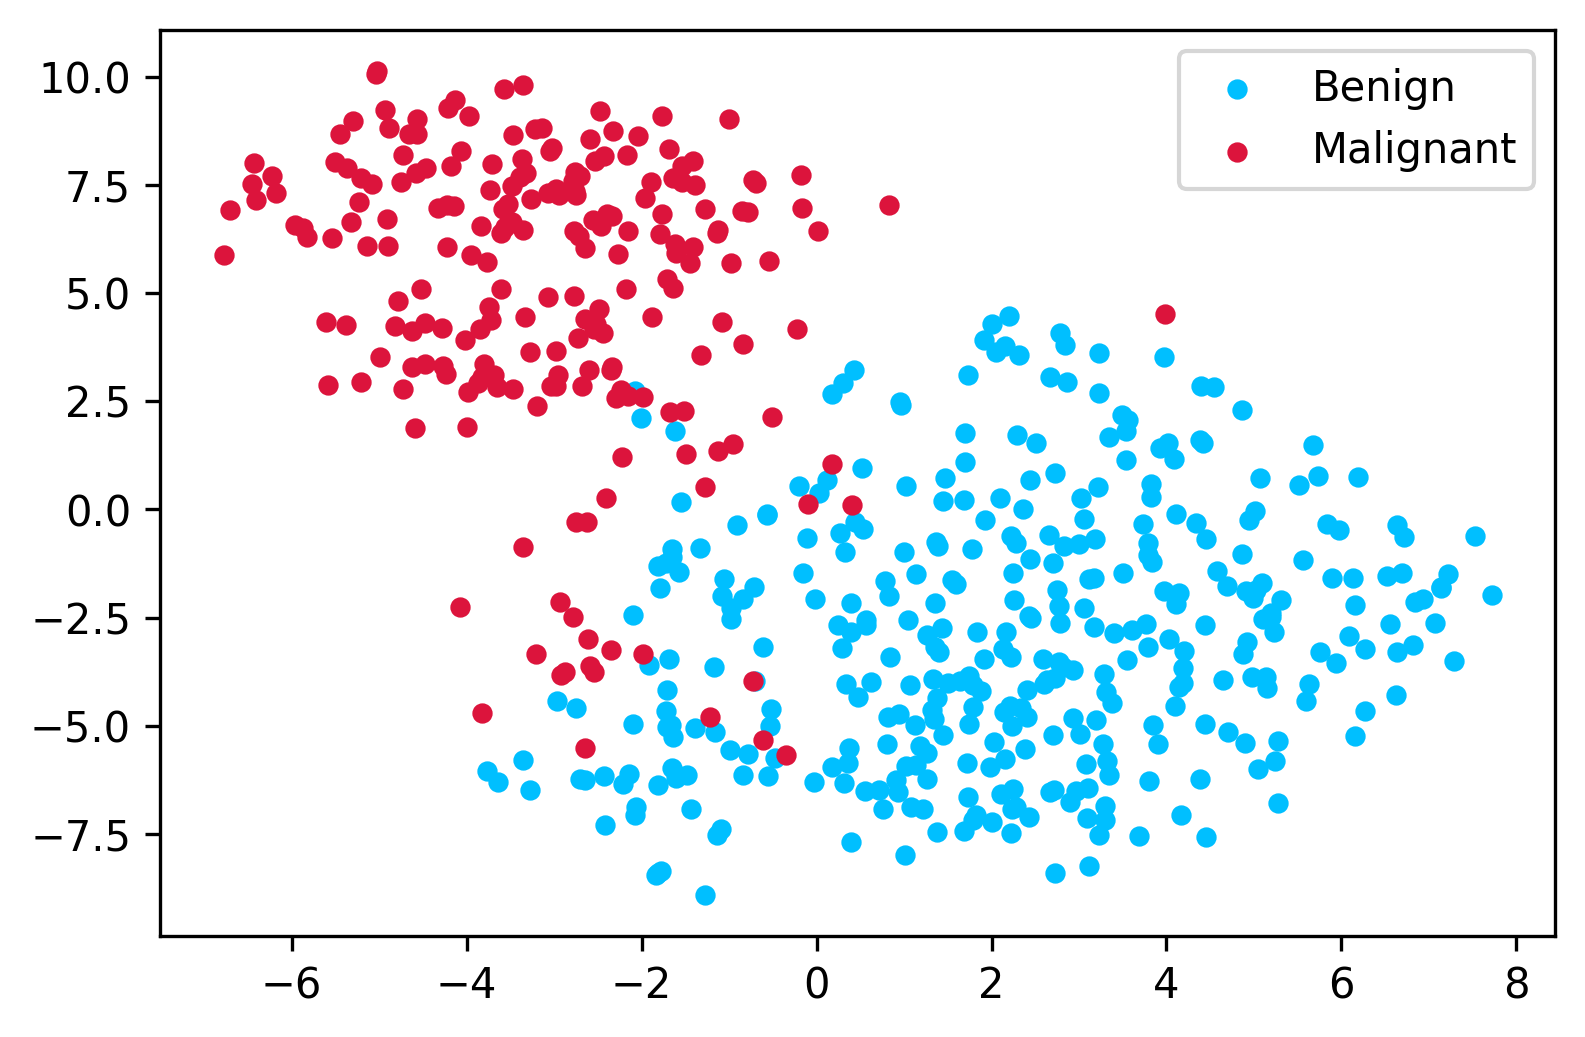

In [ ]:
tsne = TSNE(n_components=2, perplexity=100,n_iter=2000,learning_rate=10,random_state=310).fit_transform(Xs)
plt.scatter(tsne[(y=='B'),0],tsne[(y=='B'),1],color='deepskyblue',s=15)
plt.scatter(tsne[(y=='M'),0],tsne[(y=='M'),1],color='crimson',s=15)
plt.legend(['Benign','Malignant'])
plt.show()

###2. UMAP (Uniform Manifold Approximation and Projection)

Authors: Leland McInnes, John Healy and James Melville

Abstract: UMAP (Uniform Manifold Approximation and Projection) is a novel
manifold learning technique for dimension reduction. UMAP is constructed
from a theoretical framework based in Riemannian geometry and algebraic
topology. The result is a practical scalable algorithm that is applicable to
real world data. The UMAP algorithm is competitive with t-SNE for visualization quality, and arguably preserves more of the global structure with
superior run time performance. Furthermore, UMAP has no computational
restrictions on embedding dimension, making it viable as a general purpose
dimension reduction technique for machine learning.

https://arxiv.org/pdf/1802.03426.pdf

https://pair-code.github.io/understanding-umap/#:~:text=In%20the%20simplest%20sense%2C%20UMAP,as%20structurally%20similar%20as%20possible.&text=This%20is%20really%20just%20a,that%20two%20points%20are%20connected.


In [ ]:
!pip install umap-learn

In [ ]:
import umap.umap_ as umap

In [ ]:
umap_data = umap.UMAP(n_neighbors=21, min_dist=0.8, n_components=2).fit_transform(Xs)

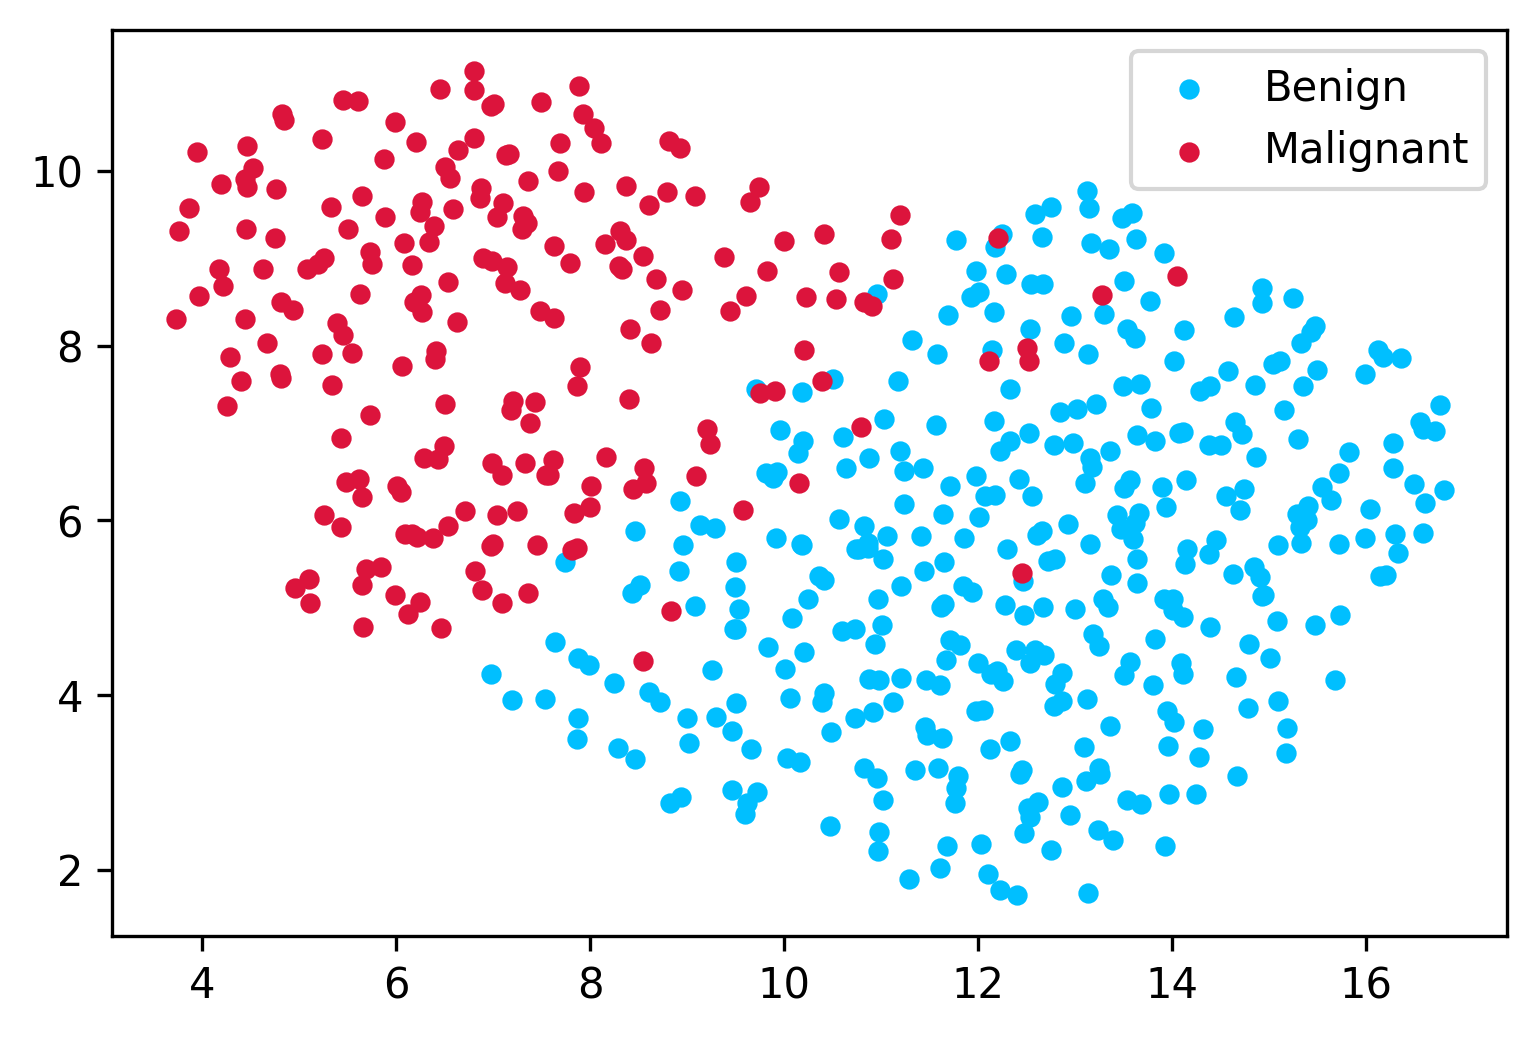

In [ ]:
plt.scatter(umap_data[(y=='B'),0],umap_data[(y=='B'),1],color='deepskyblue',s=15)
plt.scatter(umap_data[(y=='M'),0],umap_data[(y=='M'),1],color='crimson',s=15)
plt.legend(['Benign','Malignant'])
plt.show()